In [1]:
from sideinfo import *
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

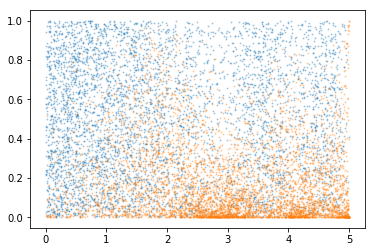

In [2]:
#generate 1d data and plot
#X = np.random.uniform(high = 5, size = (20000,))
#pi1 = (5-X) / 10.0
data = np.loadtxt(open("data.csv", "rb"), delimiter=",", skiprows=1)
x = data[:,0]
p = data[:,1]
h = data[:,2]
n_samples = len(x)

#p, h, x = generate_data_1D_cont(pi1, X)
plt.scatter(x[h==0], p[h==0], 1, alpha = 0.3)
plt.scatter(x[h==1], p[h==1], 1, alpha = 0.3)

In [3]:
network = get_network()
optimizer = optim.Adagrad(network.parameters(), lr = 0.01)

In [4]:
print(BH(p))
print(Storey_BH(p))
p_target = np.ones(x.shape) * Storey_BH(p)[1]
loss_hist = train_network_to_target_p(network, optimizer, x, p_target)

(294, 0.0014594187926900001)
(471, 0.0037831248901100002, 0.62050000000000005)
0
100
200
300
400
500
600
700
800
900


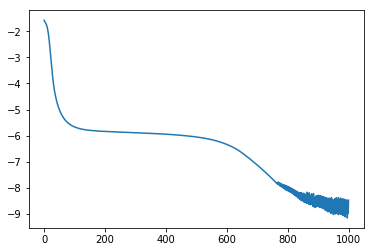

In [5]:
plt.plot(np.log(loss_hist))

In [6]:
optimizer = optim.Adagrad(network.parameters(), lr = 0.01)
loss_hist, s, s2 = train_network(network, optimizer, x, p, num_it = 1000)

0
100
200
300
400
500
600
700
800
900


(Variable containing:
 0.1125
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-03 *
  5.6185
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  4.9934
[torch.FloatTensor of size 1]
)


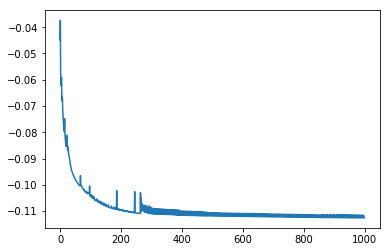

In [7]:
plt.plot(loss_hist)
print(s,s2, s2/s)

In [8]:
n_samples = len(x)
x_input = Variable(torch.from_numpy(x.astype(np.float32).reshape(n_samples ,1)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))
output = network.forward(x_input)
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

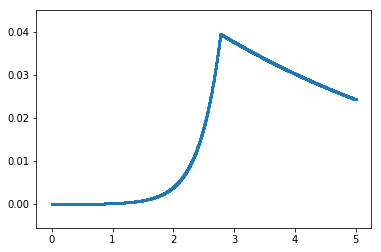

In [9]:
plt.scatter(x, output.data.numpy(), 2)

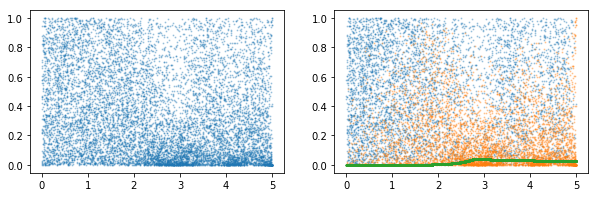

In [10]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.scatter(x, p, 1, alpha = 0.3)
plt.subplot(1,2,2)
plt.scatter(x[h==0], p[h==0], 1, alpha = 0.3)
plt.subplot(1,2,2)
plt.scatter(x[h==1], p[h==1], 1, alpha = 0.3)
plt.scatter(x, output.data.numpy(), 1)

In [11]:
sum(pred)

1159.0